In [1]:
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.utils import np_utils, pad_sequences

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000,
                                                         test_split=0.2)

category = numpy.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [3]:
x_train = pad_sequences(X_train, maxlen=100)
x_test = pad_sequences(X_test, maxlen=100)
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=100, epochs=20, 
                    validation_data=(x_test, y_test))

print("\n👉 Test Accuracy : %.4f" %(model.evaluate(x_test, y_test)[1]))

Epoch 1/20
90/90 [==============================] - 39s 358ms/step - loss: 2.5774 - accuracy: 0.3524 - val_loss: 2.1799 - val_accuracy: 0.4510
Epoch 2/20
90/90 [==============================] - 30s 332ms/step - loss: 1.9541 - accuracy: 0.5040 - val_loss: 1.7879 - val_accuracy: 0.5454
Epoch 3/20
90/90 [==============================] - 29s 324ms/step - loss: 1.7581 - accuracy: 0.5346 - val_loss: 1.7726 - val_accuracy: 0.5316
Epoch 4/20
90/90 [==============================] - 29s 321ms/step - loss: 1.6783 - accuracy: 0.5686 - val_loss: 1.6697 - val_accuracy: 0.5855
Epoch 5/20
90/90 [==============================] - 29s 320ms/step - loss: 1.6020 - accuracy: 0.5981 - val_loss: 1.5936 - val_accuracy: 0.6037
Epoch 6/20
90/90 [==============================] - 29s 319ms/step - loss: 1.4947 - accuracy: 0.6235 - val_loss: 1.4988 - val_accuracy: 0.6371
Epoch 7/20
90/90 [==============================] - 28s 309ms/step - loss: 1.3601 - accuracy: 0.6581 - val_loss: 1.4573 - val_accuracy: 0.6434

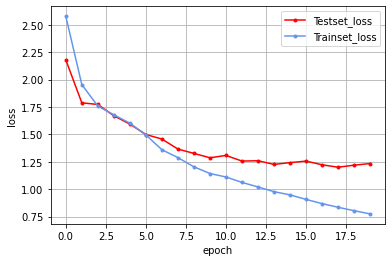

In [4]:
y_vloss = history.history['val_loss']

y_loss = history.history['loss']

x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='cornflowerblue', label = 'Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()